In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Training the model

The train_model function will train the model by using Gradient Descent estimation for the parameters. It starts off by randomly initializing the weights with numbers between 0 to 9. Then, it will start estimating the parameters via gradient descent.

The steps for this part is as follows:
> 1. Randomly initialize the weights
> 2. Calculate the cost for this model
> 3. Improve the weights by estimating via Gradient Descent algorithm
> 4. Return the estimated weights and cost history

#### References used

https://medium.com/geekculture/linear-regression-from-scratch-in-python-without-scikit-learn-a06efe5dedb6

https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/ 

In [62]:
def train_model(X, y, alpha, max_epoch):
    """ Pass four arguments
        Arguments:
            X: input features
            y: responses
            alpha: learning rate
            max_epoch: maximum epochs
        Returns:
            w: estimated weights
            hist_loss: training loss history
    """
    hist_loss = []
    # Initialize weights with random values
    w = np.array(np.random.randint(0, 9, np.shape(X)[1]))

    # We calculate the loss function for the first randomly initialized weights, and store it
    y_pred = prediction(w, X)
    current_loss = loss_fn(y, y_pred)
    n = len(y)

    for i in range(max_epoch):
        # Estimate the parameter using the randomly initialized weights and loss function for it
        gradient = -(np.matmul((y-y_pred), X))/n
        w = w - alpha * gradient

        # Predict with the new weights, and calculate the loss function for it, and store it
        y_pred = prediction(w, X)
        current_loss = loss_fn(y, y_pred)
        hist_loss.append(current_loss)

    return w, hist_loss



### Helper Function

The helper function here is used to help in splitting the dataset into training and testing data. Very much like Scikit Learn's train_test_split function. It first calculates the number of datas to be taken based on the splitting ratio pre-defined. Then it will obtain a random order of indexes based on the number of rows of the dataset. The code will then split the dataset according to the ratio in a randomized order.

The steps for this part is as follows:
> 1. Calculate number of rows to be taken
> 2. Obtain an array of randomized indexes
> 3. Split the dataset according to the number of rows and the randomized index.
> 4. Return the splitted dataset

#### References used

https://stackoverflow.com/questions/66079043/split-dataset-without-using-scikit-learn-train-test-split

In [63]:
# Helper function to split dataset into 8:2 training to testing dataset ratio
def split_dataset(X, y):
    # i will be the number of training datas
    i = int((1 - 0.2) * X.shape[0])

    # Generates random numbers based on the numbers of data
    o = np.random.permutation(X.shape[0])

    """ The following lines will basically rearrange the whole X and y dataset based on the randomized order
        Then, we will split it based on the number of training size
    """
    X_train, X_test = np.split(np.take(X, o, axis=0), [i])
    y_train, y_test = np.split(np.take(y, o), [i])
    return X_train, X_test, y_train, y_test

### Prediction of the model

This prediction will return the predicted values of a model

In [64]:
def prediction(w, X):
    """ Pass two arguments
        Arguments:
            w: weights
            X: input features
        Returns:
            yhat: predicted values
    """
    yhat = np.matmul(X, w)
    return yhat

### Loss function of the model

This loss function will only return the loss of the model. The loss function returned is Mean Squared Error divided by two for a smaller number and mathematical ease.

In [65]:
def loss_fn(y, yhat):
    """ Pass two arguments
        Arguments:
            y: responses
            yhat: predicted value
        Returns:
            loss: loss value
    """
    n = len(y)
    loss = np.sum((y - yhat)**2) / (2 * n)
    return loss
    

### Main function

In [66]:
if __name__ == "__main__":
    # Read data from csv file
    data = pd.read_csv("assignment1_dataset.csv", sep=",")
    data = data[["f1", "f2", "f3", "f4", "f5", "response"]]
    predict = "response"

    # Defining the x and y data as well as number of epochs
    x = data.drop([predict], 1).values
    y = data[predict]
    epochs = 100
    
    # We are adding a data with value 1 in front of the current data to allow for the calculation of bias.
    # This will be helpful during prediction when we use np.matmul to calculate our predictions
    x0 = np.ones(len(data))
    x = np.concatenate([np.vstack(x0),x], axis=1)

    # Splits the dataset and train the model, after that, use the model to predict with the test dataset.
    X_train, X_test, y_train, y_test = split_dataset(x, y)
    weights, hist_loss = train_model(X_train, y_train, 0.2, epochs)
    print(hist_loss)
    print("\nEstimated weights: " + str(weights) + str(weights.shape))

    prediction = prediction(weights, X_test)
    loss = loss_fn(y_test, prediction)
    print("The loss of the current model: " + str(loss))
    

[521.7524953985239, 322.50180723637226, 201.4346610878042, 127.77413811637015, 82.89575251534623, 55.515048908575594, 38.78616544038516, 28.550567276411922, 22.278781544389332, 18.43013982121879, 16.06494273361282, 14.60923315354491, 13.71194421627015, 13.158031550834504, 12.815578100965148, 12.603541150917085, 12.472058504225092, 12.390406278388454, 12.339624855556345, 12.307996815349506, 12.288269750588274, 12.275948166206735, 12.26824135562696, 12.263414368756752, 12.260387041853546, 12.258485910751022, 12.25729048794587, 12.256537870269343, 12.25606345682502, 12.255764054447996, 12.25557488327437, 12.255455225262606, 12.25537945455816, 12.255331423823828, 12.255300946191301, 12.255281587623031, 12.255269279796503, 12.255261447447817, 12.255256458696296, 12.255253278397044, 12.255251249276844, 12.255249953592989, 12.255249125593558, 12.255248596064966, 12.255248257169098, 12.255248040123906, 12.25524790102264, 12.255247811815527, 12.255247754569387, 12.255247717810475, 12.2552476941

In [67]:
x

array([[ 1.        , -0.7642162 , -1.01620947,  0.14940999, -0.05011893,
        -0.57812661],
       [ 1.        ,  0.76387973, -1.15950917, -0.72149225, -0.65406671,
        -0.43167031],
       [ 1.        ,  0.51932888, -0.66462118, -1.69490367,  1.33977899,
         0.18276429],
       ...,
       [ 1.        ,  0.34318091,  0.43124139, -0.05471514,  0.94542335,
        -2.4746844 ],
       [ 1.        ,  0.39102139,  0.49414714,  0.10640306, -0.65227822,
        -0.20013865],
       [ 1.        , -0.3761683 , -0.05426566, -0.88017593, -0.33424598,
        -0.04344723]])

### Display graph

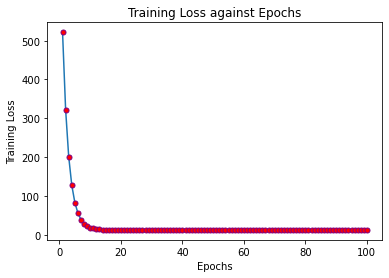

In [68]:
x = np.linspace(1, epochs, epochs)
plt.title("Training Loss against Epochs")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.plot(x, hist_loss, marker=".", markerfacecolor="red", markeredgecolor="purple", markersize=10.0)
plt.show()

### Displaying Mean Squred Error and R-Squared Error

In [69]:
# Loss times 2 is because our loss is divided by 2
print("Mean Squared Error: " + str(loss * 2))

sst = sum((y_test - y_test.mean())**2)
r2Error = 1 - ((loss * 2 * len(y_test))/sst)
print("R-Squared Error: " + str(r2Error))

Mean Squared Error: 26.999455861994814
R-Squared Error: 0.9820008441924185
